## Importing tensorflow and other dependencies

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


### Dataset:

In [4]:
f_mnist=keras.datasets.fashion_mnist

## Loading the Data, and splitting it into training and testing sets.
### The train_images and train_labels arrays are the training set — that is, the data, the model uses to learn.
### The model is tested against the test set, the test_images, and test_labels arrays.

In [5]:
(train_images,train_labels),(test_images,test_labels)=f_mnist.load_data()

4423680/4422102 [==============================] - 12s 3us/step


In [6]:
#Since the class names are not included with the dataset, we store them here, to use later, when plotting the images
class_names=['Tshirt/top','Trouser','Pullover','Coat', 'Sandal', 'Shirt' , 'Sneaker','Bag ','Ankle Boot']

In [11]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [12]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

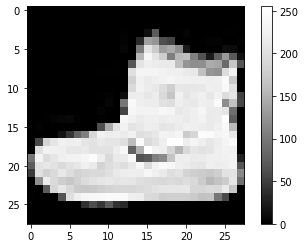

In [18]:
plt.imshow(train_images[0],cmap='Greys_r')
plt.colorbar()
plt.grid(False)

plt.show()

In [20]:
train_images=train_images/255.0
test_images=test_images/255.0

#### For verification that our image data has been correctly mapped to a label, we will
#### display the first 25 images from the training set and display the class name below each image.

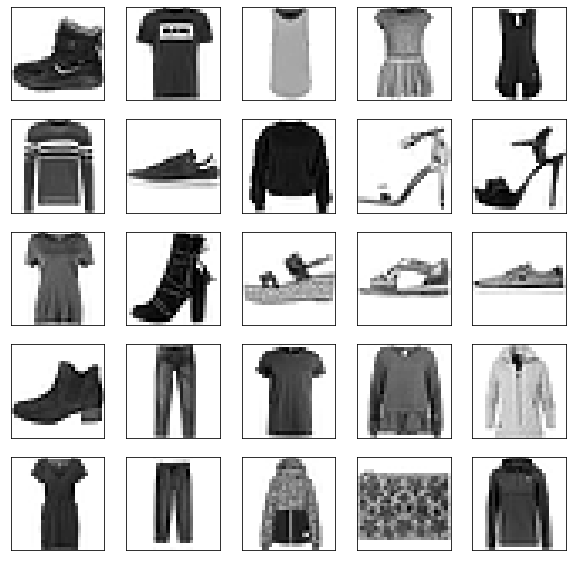

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

## Now, we will build the model and set up the layers of the Neural Network.

In [30]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

### Optimizing the model

In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4683 - accuracy: 0.8344
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4533 - accuracy: 0.8412
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4416 - accuracy: 0.8436
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4314 - accuracy: 0.8475
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4231 - accuracy: 0.8505
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4160 - accuracy: 0.8529
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4097 - accuracy: 0.8547
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4036 - accuracy: 0.8574
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3987 - accuracy: 0.8598
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.394

In [59]:
test_loss, test_acc=model.evaluate(test_images,test_labels)
print('test accuracy',test_acc)
#here, as we can see that the testing data accuracy is less than training data, this is a classic case of over fitting

313/313 [==============================] - 1s 2ms/step - loss: 0.4318 - accuracy: 0.8441
test accuracy 0.8440999984741211


In [39]:
predictions = model.predict(test_images)

In [60]:
np.argmax(predictions[0])
#This implies that our model has correctly predicted the category of the object in the test image

9

In [43]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

In [47]:
#plt.xlabel("{} {:2.0f}% ({})".format(train_images[predicted_label],100*np.max(predictions_array),Categories[true_label]),color=color)

NameError: name 'predicted_label' is not defined

In [50]:
# Plotting the Graph
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



## Predicting the labels of a batch of images.

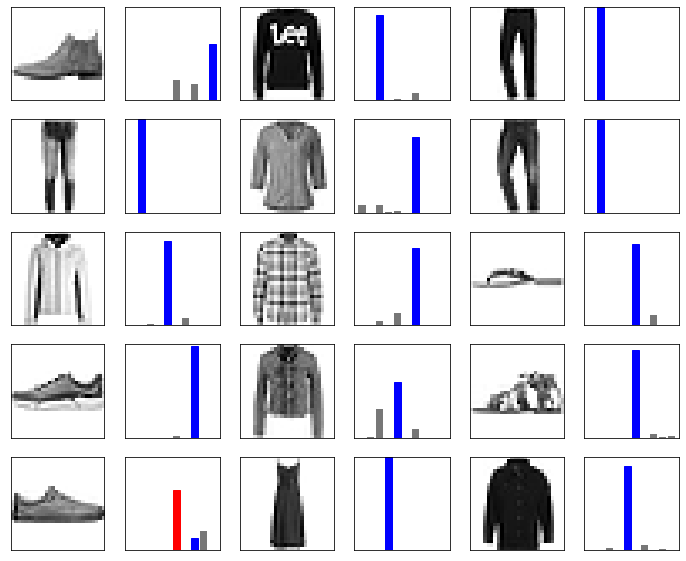

In [58]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [52]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28)


In [53]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)


(1, 28, 28)


In [54]:
predictions_single = model.predict(img)
print(predictions_single)


[[3.8973599e-07 3.2940328e-08 5.5298619e-06 1.2402450e-06 6.8241720e-06
  2.1433331e-01 1.6963662e-05 1.7742805e-01 3.5222278e-03 6.0468537e-01]]


9

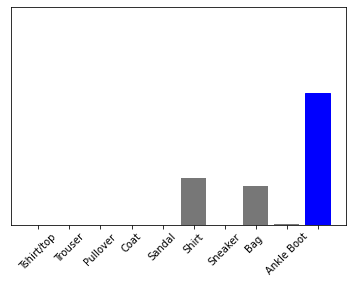

In [57]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])